In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [177]:
start='2010-01-01'
end='2019-12-31'

df = data.DataReader('AAPL','yahoo',start,end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [178]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,71.222504,70.730003,71.172501,71.067497,48478800.0,69.738724
2019-12-26,72.495003,71.175003,71.205002,72.477501,93121200.0,71.122353
2019-12-27,73.492500,72.029999,72.779999,72.449997,146266000.0,71.095383
2019-12-30,73.172501,71.305000,72.364998,72.879997,144114400.0,71.517342
2019-12-31,73.419998,72.379997,72.482498,73.412498,100805600.0,72.039879


In [179]:
df=df.reset_index(drop=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close
0,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
4,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [180]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
0,7.619643,7.520000,7.611786,7.526071,352410800.0,6.426000
1,7.660714,7.585000,7.622500,7.643214,493729600.0,6.526020
2,7.699643,7.616071,7.664286,7.656429,601904800.0,6.537303
3,7.686786,7.526786,7.656429,7.534643,552160000.0,6.433319
4,7.571429,7.466071,7.562500,7.520714,477131200.0,6.421426


In [181]:
df=df.drop(["Adj Close"], axis=1)
df.head()
df.tail()

,High,Low,Open,Close,Volume
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0
2516,73.419998,72.379997,72.482498,73.412498,100805600.0


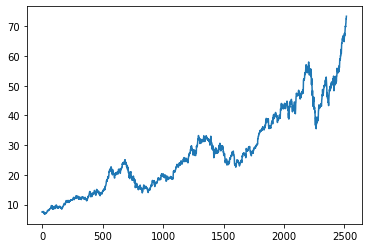

In [182]:
plt.plot(df.Close)

In [183]:
df


,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2512,71.222504,70.730003,71.172501,71.067497,48478800.0
2513,72.495003,71.175003,71.205002,72.477501,93121200.0
2514,73.492500,72.029999,72.779999,72.449997,146266000.0
2515,73.172501,71.305000,72.364998,72.879997,144114400.0


In [184]:
ma100=df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    59.401700
2513    59.643125
2514    59.875125
2515    60.106325
2516    60.331875
Name: Close, Length: 2517, dtype: float64

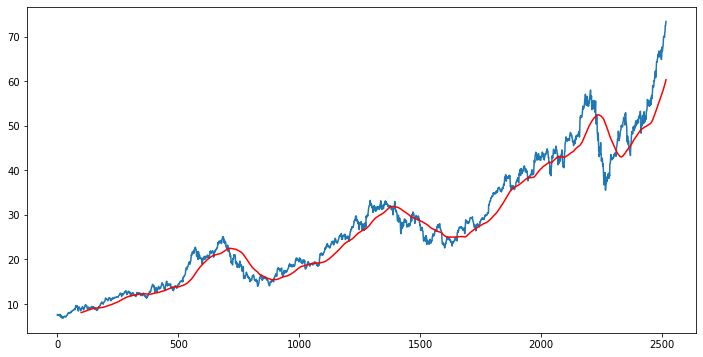

In [185]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [186]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2512    54.261513
2513    54.396763
2514    54.529350
2515    54.661100
2516    54.793137
Name: Close, Length: 2517, dtype: float64

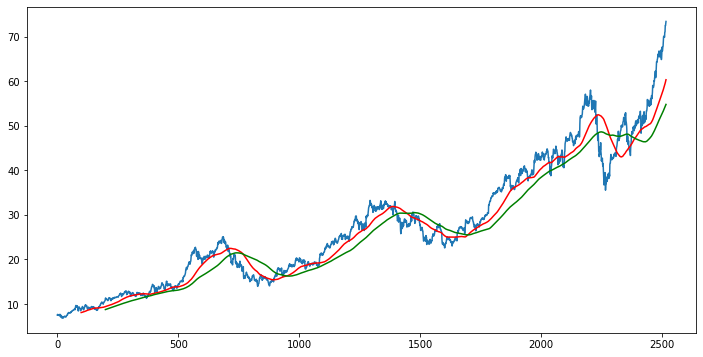

In [187]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [188]:
df.shape


(2517, 5)

In [189]:
#splitting data into trainnign and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1761, 1)
(756, 1)


In [190]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [191]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [193]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.02527908],
       [0.02971782],
       [0.03021854],
       ...,
       [0.84388656],
       [0.85089656],
       [0.84616011]])

In [194]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train=np.array(x_train),np.array(y_train)

In [195]:
#ML MODEL

In [196]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [197]:
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model=Sequential()
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model=Sequential()
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model=Sequential()
model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [198]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 4s 57ms/step - loss: 0.0646
Epoch 2/50
52/52 [==============================] - 4s 79ms/step - loss: 0.0128
Epoch 3/50
52/52 [==============================] - 4s 78ms/step - loss: 0.0100
Epoch 4/50
52/52 [==============================] - 4s 75ms/step - loss: 0.0095
Epoch 5/50
52/52 [==============================] - 4s 72ms/step - loss: 0.0091
Epoch 6/50
52/52 [==============================] - 4s 69ms/step - loss: 0.0083
Epoch 7/50
52/52 [==============================] - 3s 67ms/step - loss: 0.0084
Epoch 8/50
52/52 [==============================] - 4s 68ms/step - loss: 0.0080
Epoch 9/50
52/52 [==============================] - 4s 70ms/step - loss: 0.0079
Epoch 10/50
52/52 [==============================] - 4s 85ms/step - loss: 0.0075
Epoch 11/50
52/52 [==============================] - 5s 87ms/step - loss: 0.0067
Epoch 12/50
52/52 [==============================] - 4s 81ms/step - loss: 0.0060
Epoch 13/50
52/52 [==================

In [199]:
data_testing.head()

,Close
1761,29.182501
1762,28.955000
1763,29.037500
1764,29.004999
1765,29.152500


In [200]:
data_training.tail(100)


,Close
1661,27.092501
1662,27.202499
1663,27.000000
1664,26.982500
1665,27.045000
...,...
1756,29.264999
1757,29.072500
1758,29.129999
1759,29.315001


In [201]:
past_100_days=data_training.tail(100)

In [202]:
final_df=past_100_days.append(data_testing,ignore_index=True)


C:\Users\Shashank Shekhar\AppData\Local\Temp\ipykernel_1464\2155672971.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [203]:
final_df.head()

,Close
0,27.092501
1,27.202499
2,27.000000
3,26.982500
4,27.045000


In [204]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.0275037 ],
       [0.02981315],
       [0.02556164],
       [0.02519422],
       [0.02650642],
       [0.03332987],
       [0.03280496],
       [0.03196517],
       [0.03123034],
       [0.0327    ],
       [0.02823853],
       [0.0300231 ],
       [0.02571909],
       [0.02330465],
       [0.01999793],
       [0.01936806],
       [0.01506405],
       [0.01558892],
       [0.01889569],
       [0.02414448],
       [0.02398698],
       [0.0274512 ],
       [0.01254461],
       [0.        ],
       [0.01212474],
       [0.02529918],
       [0.04534957],
       [0.065295  ],
       [0.06188327],
       [0.05484991],
       [0.05479741],
       [0.05469245],
       [0.06030866],
       [0.05028345],
       [0.05117573],
       [0.05227797],
       [0.05679194],
       [0.04750159],
       [0.05206806],
       [0.04928616],
       [0.0518056 ],
       [0.05206806],
       [0.05647702],
       [0.05736931],
       [0.06781443],
       [0.06912663],
       [0.07458534],
       [0.072

In [205]:
input_data.shape

(856, 1)

In [206]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [207]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(756, 100, 1)
(756,)


In [208]:
#Making Predictions
y_predicted=model.predict(x_test)


24/24 [==============================] - 1s 26ms/step


In [209]:
y_predicted.shape


(756, 1)

In [210]:
y_test

array([0.07138362, 0.06660719, 0.06833931, 0.06765694, 0.07075375,
       0.07757719, 0.08324586, 0.08387573, 0.08723495, 0.08461056,
       0.08350831, 0.08854715, 0.08849465, 0.08739241, 0.08854715,
       0.08896706, 0.08838969, 0.09841487, 0.09872982, 0.09878228,
       0.09710267, 0.09563301, 0.13447409, 0.13331935, 0.1362062 ,
       0.14255719, 0.14906573, 0.15174258, 0.15373715, 0.15216249,
       0.15830357, 0.16738404, 0.1699559 , 0.16911615, 0.17105818,
       0.17620198, 0.178354  , 0.17530969, 0.17599206, 0.17740917,
       0.17772417, 0.19242073, 0.1880643 , 0.19236827, 0.19005879,
       0.19100361, 0.18827421, 0.18659456, 0.18900904, 0.18932396,
       0.18822176, 0.19593749, 0.19714469, 0.19347055, 0.20118628,
       0.19268318, 0.20097628, 0.19835189, 0.19688223, 0.19814197,
       0.21346844, 0.21514801, 0.21415073, 0.21273361, 0.21294353,
       0.21855977, 0.21462318, 0.21273361, 0.21105396, 0.21016167,
       0.20207857, 0.20297085, 0.19903426, 0.20312831, 0.19982

In [211]:
y_predicted

array([[0.09179497],
       [0.09290609],
       [0.09338838],
       [0.09388685],
       [0.09418309],
       [0.09466997],
       [0.095716  ],
       [0.09722123],
       [0.09871367],
       [0.10044494],
       [0.10182384],
       [0.10298729],
       [0.10449597],
       [0.10585998],
       [0.1069935 ],
       [0.10810637],
       [0.10912752],
       [0.10997194],
       [0.11163813],
       [0.11320785],
       [0.11467616],
       [0.11586712],
       [0.11679387],
       [0.12118658],
       [0.12527306],
       [0.12947455],
       [0.1340134 ],
       [0.13883439],
       [0.14354393],
       [0.1480483 ],
       [0.15199937],
       [0.15607786],
       [0.16053227],
       [0.16479018],
       [0.16856232],
       [0.17209476],
       [0.17567044],
       [0.17904031],
       [0.18177268],
       [0.18421131],
       [0.18643609],
       [0.18838076],
       [0.19131662],
       [0.1936127 ],
       [0.19604374],
       [0.19802976],
       [0.19986197],
       [0.201

In [212]:
scaler.scale_

array([0.02099517])

In [213]:
scale_factor=1/0.02099517
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

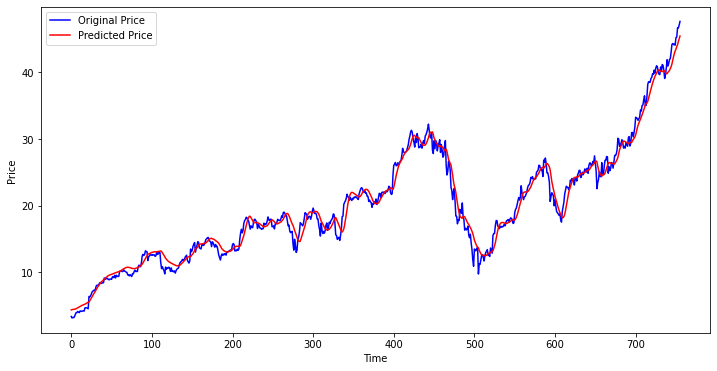

In [214]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [215]:
y_test

array([ 3.40000177,  3.17250083,  3.2550013 ,  3.22250007,  3.37000108,
        3.69500186,  3.96500043,  3.99500112,  4.15500098,  4.03000097,
        3.9775012 ,  4.21750098,  4.21500045,  4.16250068,  4.21750098,
        4.23750144,  4.21000129,  4.68750033,  4.70250163,  4.70500026,
        4.62500033,  4.55500063,  6.40500114,  6.35000083,  6.4875016 ,
        6.78999949,  7.10000088,  7.22749952,  7.32250075,  7.24749998,
        7.53999954,  7.97250232,  8.09499988,  8.05500278,  8.14750157,
        8.39250052,  8.49500144,  8.35000097,  8.38250219,  8.44999945,
        8.46500266,  9.16499965,  8.957503  ,  9.16250103,  9.05250041,
        9.0975024 ,  8.96750132,  8.88749948,  9.00250117,  9.01750056,
        8.96500269,  9.33250302,  9.39000196,  9.21500271,  9.58250304,
        9.17750042,  9.5725009 ,  9.4475009 ,  9.3775012 ,  9.43750257,
       10.16750217, 10.24750019, 10.19999957, 10.13250232, 10.14250064,
       10.41000249, 10.22250248, 10.13250232, 10.05250048, 10.01

In [216]:
y_predicted

array([[ 4.3721943],
       [ 4.425117 ],
       [ 4.4480886],
       [ 4.471831 ],
       [ 4.4859405],
       [ 4.5091305],
       [ 4.5589533],
       [ 4.630647 ],
       [ 4.701732 ],
       [ 4.7841926],
       [ 4.8498693],
       [ 4.905285 ],
       [ 4.9771433],
       [ 5.042111 ],
       [ 5.0961003],
       [ 5.149107 ],
       [ 5.197744 ],
       [ 5.2379637],
       [ 5.317324 ],
       [ 5.39209  ],
       [ 5.4620256],
       [ 5.518751 ],
       [ 5.562892 ],
       [ 5.772117 ],
       [ 5.9667563],
       [ 6.166873 ],
       [ 6.3830585],
       [ 6.612682 ],
       [ 6.8369975],
       [ 7.0515404],
       [ 7.2397304],
       [ 7.4339886],
       [ 7.646152 ],
       [ 7.8489566],
       [ 8.028624 ],
       [ 8.196874 ],
       [ 8.367184 ],
       [ 8.52769  ],
       [ 8.657833 ],
       [ 8.773985 ],
       [ 8.8799515],
       [ 8.972576 ],
       [ 9.112411 ],
       [ 9.221773 ],
       [ 9.3375635],
       [ 9.4321575],
       [ 9.519426 ],
       [ 9.58